# Časové vizualizace

# Line chart

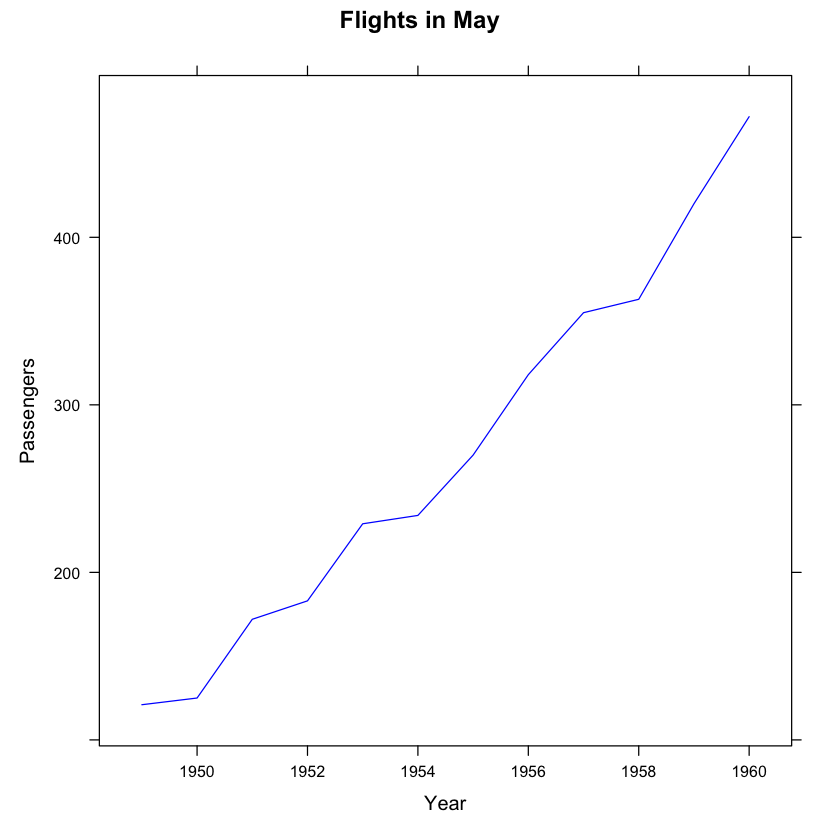

In [39]:
# Load required libraries
library(lattice)

# Load the data
df <- read.csv("data/flights.csv")

# Filter the data for May flights
may_flights <- subset(df, month == "May")

# Create line plot
xyplot(passengers ~ year, data = may_flights, type = "l", col = "blue",
       xlab = "Year", ylab = "Passengers", main = "Flights in May")


# Relační vizualizace

# Scatter plot matrix

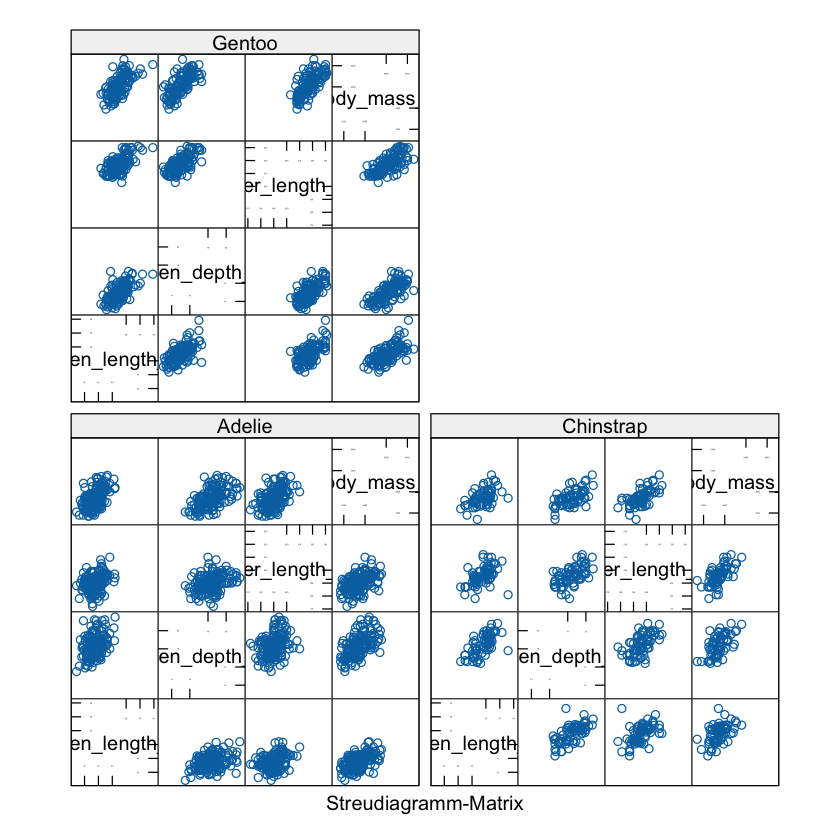

In [13]:
# Load necessary library
library(lattice)

# Load the data
df <- read.csv("data/penguins.csv")

# Define category orders
df$species <- factor(df$species, levels = c("Adelie", "Chinstrap", "Gentoo"))

# Set graphical parameters to make the plots bigger
trellis.par.set(theme = list(axis.text = list(cex = 0.1), strip.text = list(cex = 0.1)))

# Create scatterplot matrix
splom_obj <- splom(~df[, c("culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g")] | df$species,
      auto.key = list(columns = 3),
      scales = list(x = list(relation="free"), y = list(relation="free")))

# Print the scatterplot matrix
print(splom_obj)

# Vizualizace rozdělení

# Histogram

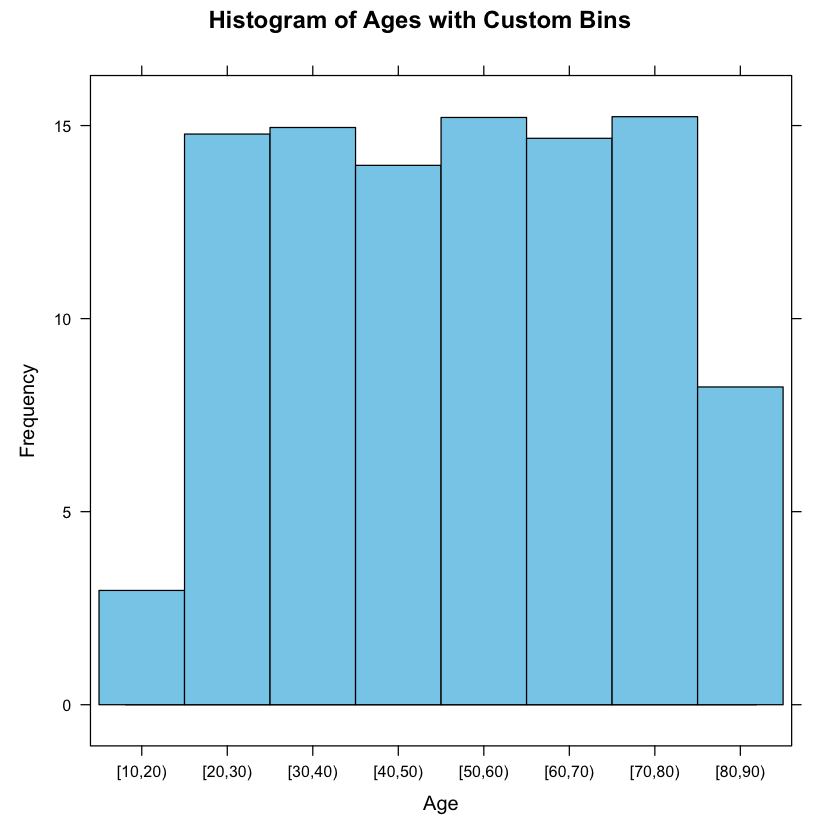

In [11]:
# Load the lattice library
library(lattice)
# Read the dataset with the specified delimiter
df <- read.csv("data/healthcare_dataset2.csv", sep=";")

# Define the age bins
age_bins <- cut(df$Age, breaks = seq(10, 100, by = 10), right = FALSE)
# Create a histogram of ages with custom bins
histogram(~age_bins, 
          data = df, 
          main = "Histogram of Ages with Custom Bins", 
          xlab = "Age",
          ylab = "Frequency",
          col = "skyblue",  # Set color of bars
          auto.key = list(space = "right", title = "Age Bins"))  # Add legend

# Box plot

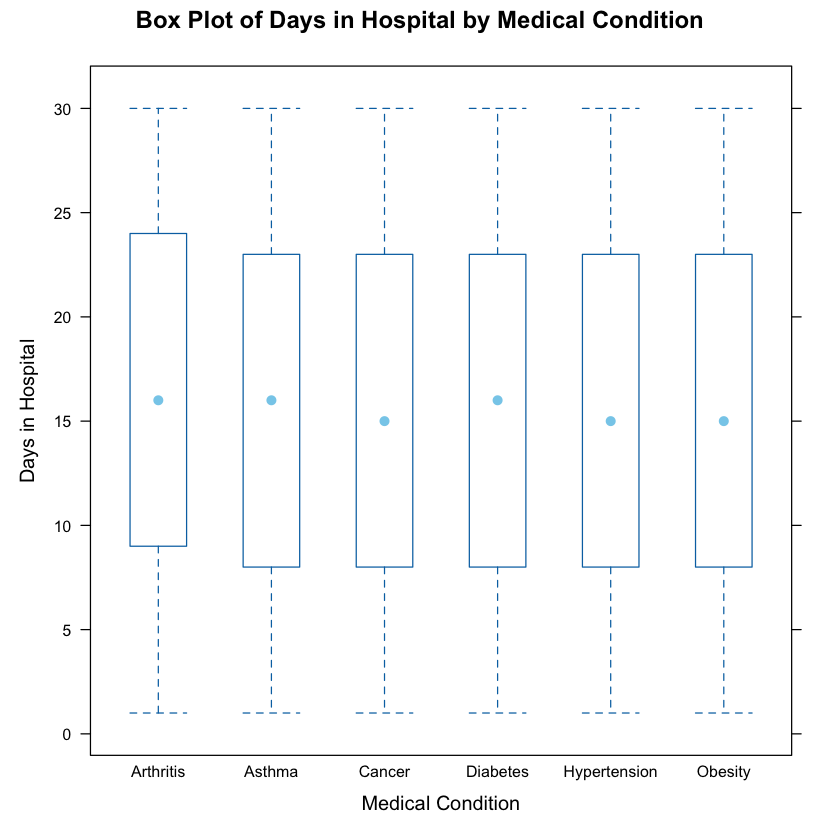

In [12]:
# Load the lattice library
library(lattice)
# Read the dataset with the specified delimiter
df <- read.csv("data/healthcare_dataset2.csv", sep=";")

# Create a box plot of days in hospital by medical condition
bwplot(Days.in.Hospital ~ Medical.Condition, 
       data = df, 
       main = "Box Plot of Days in Hospital by Medical Condition", 
       xlab = "Medical Condition",
       ylab = "Days in Hospital",
       col = "skyblue",  # Set color of boxes
       horizontal = FALSE)  # Plot vertical boxes


# Kategorické vizualizace

# Bar chart

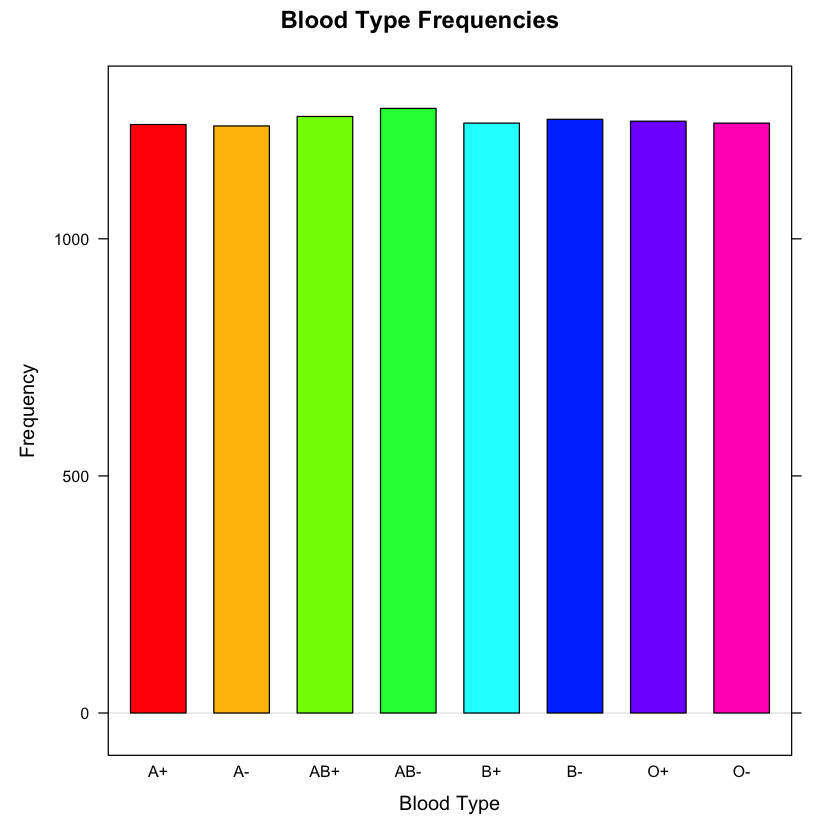

In [10]:
# Load the lattice library
library(lattice)
# Read the dataset with the specified delimiter
df <- read.csv("data/healthcare_dataset2.csv", sep=";")

# Create a table of blood type frequencies
blood_type_counts <- table(df$Blood.Type)

colors <- rainbow(length(blood_type_counts))

# Create a vertical bar chart using barchart function from lattice
barchart(blood_type_counts, 
         main="Blood Type Frequencies", 
         ylab="Frequency", 
         xlab="Blood Type", 
         col=colors,  # Assign different colors to each bar
         horizontal=FALSE,  # Vertical bar chart
         auto.key=list(space="right", title="Blood Type"))  # Add legend


# Stacked bar chart

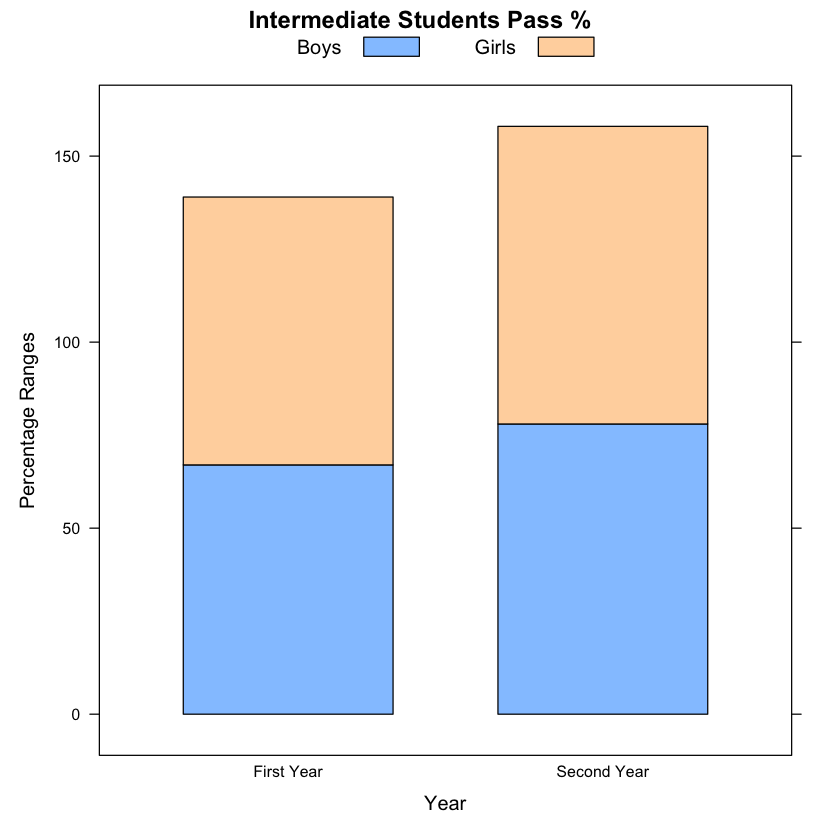

In [2]:
# Load necessary libraries
library(lattice)
library(reshape2)

# Create data
students <- data.frame(Year = c("First Year", "Second Year"),
                       Boys = c(67, 78),
                       Girls = c(72, 80))

# Reshape data to long format
students_long <- melt(students, id.vars = "Year", variable.name = "Gender", value.name = "Percentage")

# Create a stacked bar chart
barchart(Percentage ~ Year, data = students_long, groups = Gender, auto.key = list(columns = 2), 
         main = "Intermediate Students Pass %", xlab = "Year", ylab = "Percentage Ranges", 
         scales = list(x = list(rot = 0)), stack = TRUE, horizontal = FALSE)

# Hierarchické vizualizace

# Heatmap

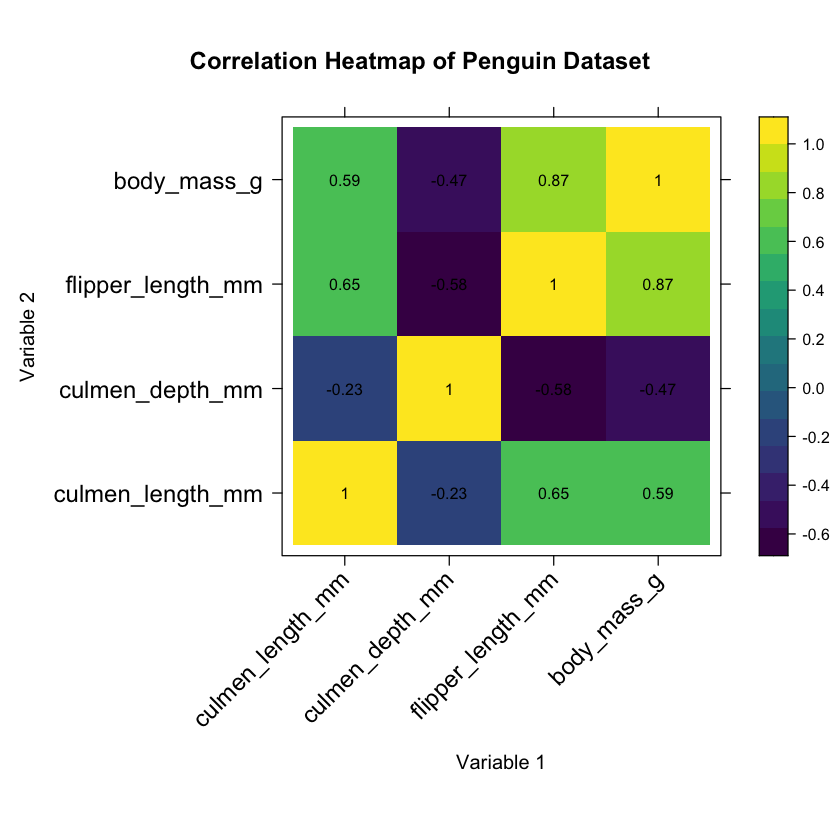

In [38]:
# Load required libraries
library(lattice)
library(viridis)

# Load the penguins dataset
penguins <- read.csv('data/penguins.csv')

# Remove missing values
penguins <- na.omit(penguins)

# Select columns 3 to 6 for heatmap
heatmap_data <- penguins[, 3:6]

# Calculate correlation matrix
correlation_matrix <- cor(heatmap_data)

# Convert the correlation matrix to a matrix
correlation_matrix <- as.matrix(correlation_matrix)

# Plot heatmap using lattice with correlation values
levelplot(correlation_matrix,
          col.regions = viridis(100),
          scales = list(x = list(rot = 45, cex = 1.2), y = list(rot = 0, cex = 1.2)),
          xlab = "Variable 1", ylab = "Variable 2",
          main = "Correlation Heatmap of Penguin Dataset",
          colorkey = list(space = 'right'),
          panel = function(...) {
            panel.levelplot(...)
            panel.text(x = rep(1:ncol(correlation_matrix), each = nrow(correlation_matrix)),
                       y = rep(1:nrow(correlation_matrix), times = ncol(correlation_matrix)),
                       labels = round(correlation_matrix, 2), cex = 0.8, col = "black")
          })


# Bubble chart

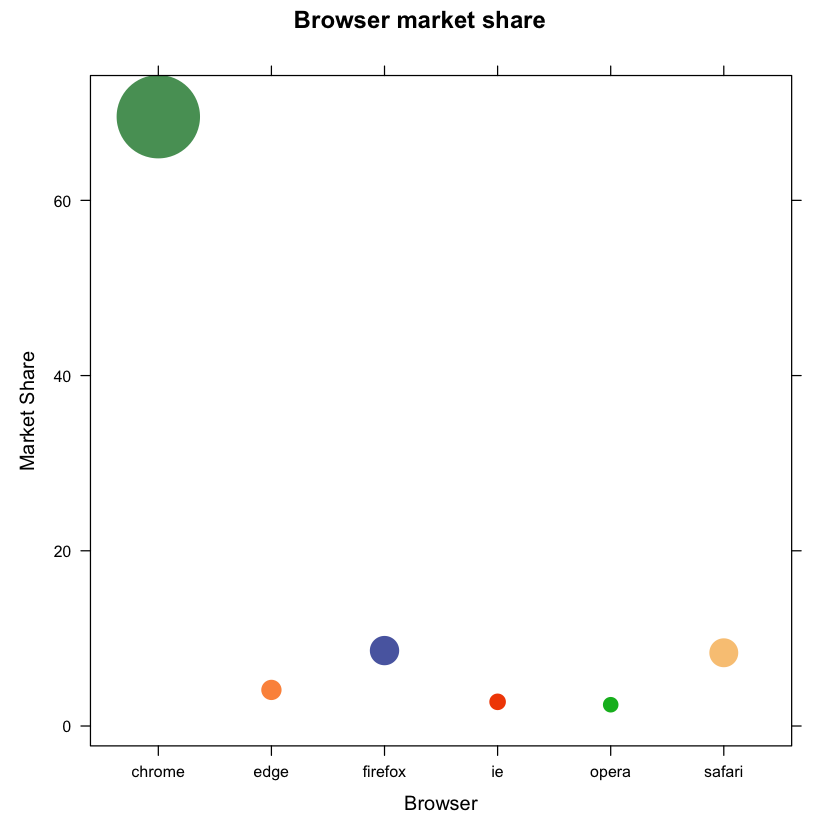

In [7]:
# Load the lattice package
library(lattice)

# Data
browser_market_share <- data.frame(
  browsers = c('firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'),
  market_share = c(8.61, 69.55, 8.36, 4.12, 2.76, 2.43),
  color = c('#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825')
)

# Convert 'browsers' to a factor
browser_market_share$browsers <- as.factor(browser_market_share$browsers)

# Create a bubble chart
xyplot(market_share ~ browsers, data = browser_market_share, 
       cex = sqrt(browser_market_share$market_share), 
       col = browser_market_share$color,
       xlab = "Browser", ylab = "Market Share",
       main = "Browser market share",
       pch = 16,
       strip = strip.custom(bg = 'white', par.strip.text = list(cex = 0.75)))